# Nature recommendations
- Images:
	- Size:
		- Full column: 183 mm (7.2 in)
		- Half column: 89 mm (3.5 in)
		- 1.5 column: 120 mm (4.72 in) or 136 mm (5.35 in)
		- Maximal height: 247 mm (9.72 in)
	- Resolution: At least 300 dpi, but 450 recommended (>450 dpi will be downsampled to 450 dpi)
	- Color space: RGB
- Text:
	- Regular text: Sans-serif (Arial, Helvetica)
	- Amino-acid sequences: Monospace (Courier New), 50 or 100 characters per line
	- Glyphs and greek characters: Symbol font
	- Size: 5-7 pt for regular text, 8 pt bold for panel labels (a, b, c, ...)
	- Axes labelled with text and units, tick marks added
	- Avoid colored text, preferring colored boxes in the legend
- Colors:
	- Use contrasting colors to aid color blind individuals
	- Use solid colors
- Saving:
	- .pdf or .eps
	- Do not convert text to raster or outlines
	- Embed fonts (TrueType 2 or 42)
	- Export at the maximal possible resolution (depending on your images), but no more than 450 dpi

# Example code

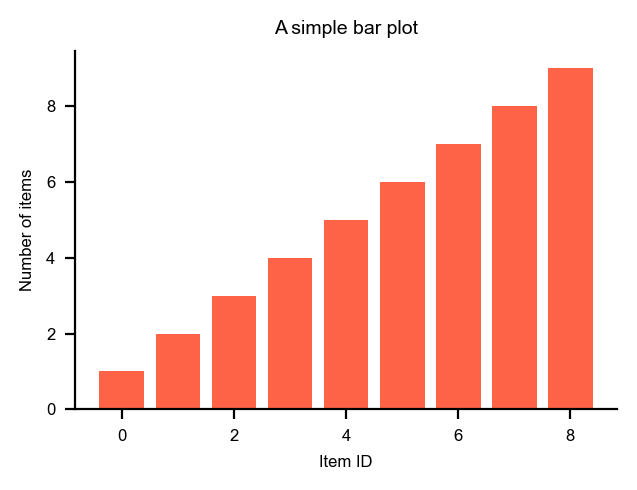

In [3]:
import io, re
import matplotlib.pyplot as plt
import pyperclip


plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['font.size'] = 6
plt.rcParams['axes.titlesize'] = 7
plt.rcParams['figure.titlesize'] = 7


def copy_and_show_fig(fig, dpi=450):
    """Copies SVG to clipboard and displays figure
    """
    buf = io.StringIO()
    fig.patch.set_visible(False)   # remove the global background patch
    for ax in fig.axes:
        ax.patch.set_visible(False)  # remove each Axes background patch
    fig.savefig(buf, format='svg', transparent=True, bbox_inches='tight', pad_inches=0)
    svg_data = buf.getvalue()

    # patch width/height from pt to px
    m = re.search(r'viewBox="\s*([-\d.]+)\s+([-\d.]+)\s+([-\d.]+)\s+([-\d.]+)"', svg_data)
    w_pt, h_pt = float(m.group(3)), float(m.group(4))
    w_px = int(round(w_pt * dpi / 72))
    h_px = int(round(h_pt * dpi / 72))

    svg_data = re.sub(r'(<svg[^>]*?)width="[^"]+"', rf'\1width="{w_px}px"', svg_data, count=1)
    svg_data = re.sub(r'(<svg[^>]*?)height="[^"]+"', rf'\1height="{h_px}px"', svg_data, count=1)
    pyperclip.copy(svg_data)

    fig.set_dpi(200)
    fig.patch.set_visible(True)


fig, ax = plt.subplots(figsize=(3.5, 2.33))  # Corresponds to 183 mm width

# This is a simple example
y = range(1, 10)
x = range(len(y))
ax.bar(x, y, color='tomato')
ax.set_title('A simple bar plot')
ax.set_xlabel('Item ID')
ax.set_ylabel('Number of items')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Draw your figure and copy SVG to clipboard
copy_and_show_fig(fig)